In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [ ]:
# 경고 제어
import warnings
warnings.filterwarnings("ignore")

In [40]:
# 한글 인코딩
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [35]:
path = './배틀그라운드_승률예측_데이터셋.csv'
data = pd.read_csv(path)

## 항목 설명

- Id : 플레이어 ID
- groupId : 그룹 식별을 위한 ID
- matchId : 경기 식별 ID
- assists : 해당 플레이어가 죽이지 못했지만 피해를 입히고 팀원이 죽인 플레이어 수
- boosts : 사용한 도핑 아이템의 수
- damageDealt : 적에게 입힌 총 데미지
- DBNOs : 기절시킨 적의 수
- headshotKills : 헤드샷으로 죽인 적 플레이어 수 
- heals : 사용한 회복 아이템 수
- killPlace : 경기에서 죽인 적 플레이어 수의 순위
- killPoints : 플레이어의 킬 기반 ELO 점수
- kills : 죽인 적 플레이어의 수
- killStreaks : 짧은 시간 내에 죽인 적 플레이어의 최대 수
- longestKill : 죽인 적 플레이어와의 거리의 최대값
- matchDuration : 경기 진행 시간(초 단위)
- matchType : 게임 모드(1인, 2인, 4인 외)
- rankPoints : 플레이어의 ELO 레이팅
- revives : 해당 플레이어가 팀원을 소생시킨 횟수
- rideDistance : 이동수단으로 이동한 총 거리(미터 단위)
- roadKills : 이동 수단으로 죽인 적 플레이어 수
- swimDistance : 수영으로 이동한 거리(미터 단위)
- teamKills : 같은 팀 플레이어를 죽인 횟수
- vehicleDestroys : 파괴한 이동수단의 수
- walkDistance : 도보로 이동한 거리(미터 단위)
- weaponsAcquired : 획득한 무기의 수
- winPoints : 승리 횟수에 기반한 유저의 랭킹 포인트
- winPlacePerc : 백분위수에 기반한 유저의 순위(1은 1등, 0은 0등)

In [3]:
#데이터 정보 불러오기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
# 데이터의 결측치 확인 -> 없음
print(data.isnull().sum(axis=0))

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


In [50]:
data = data.dropna(axis=0)
print(data.isnull().sum())

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64


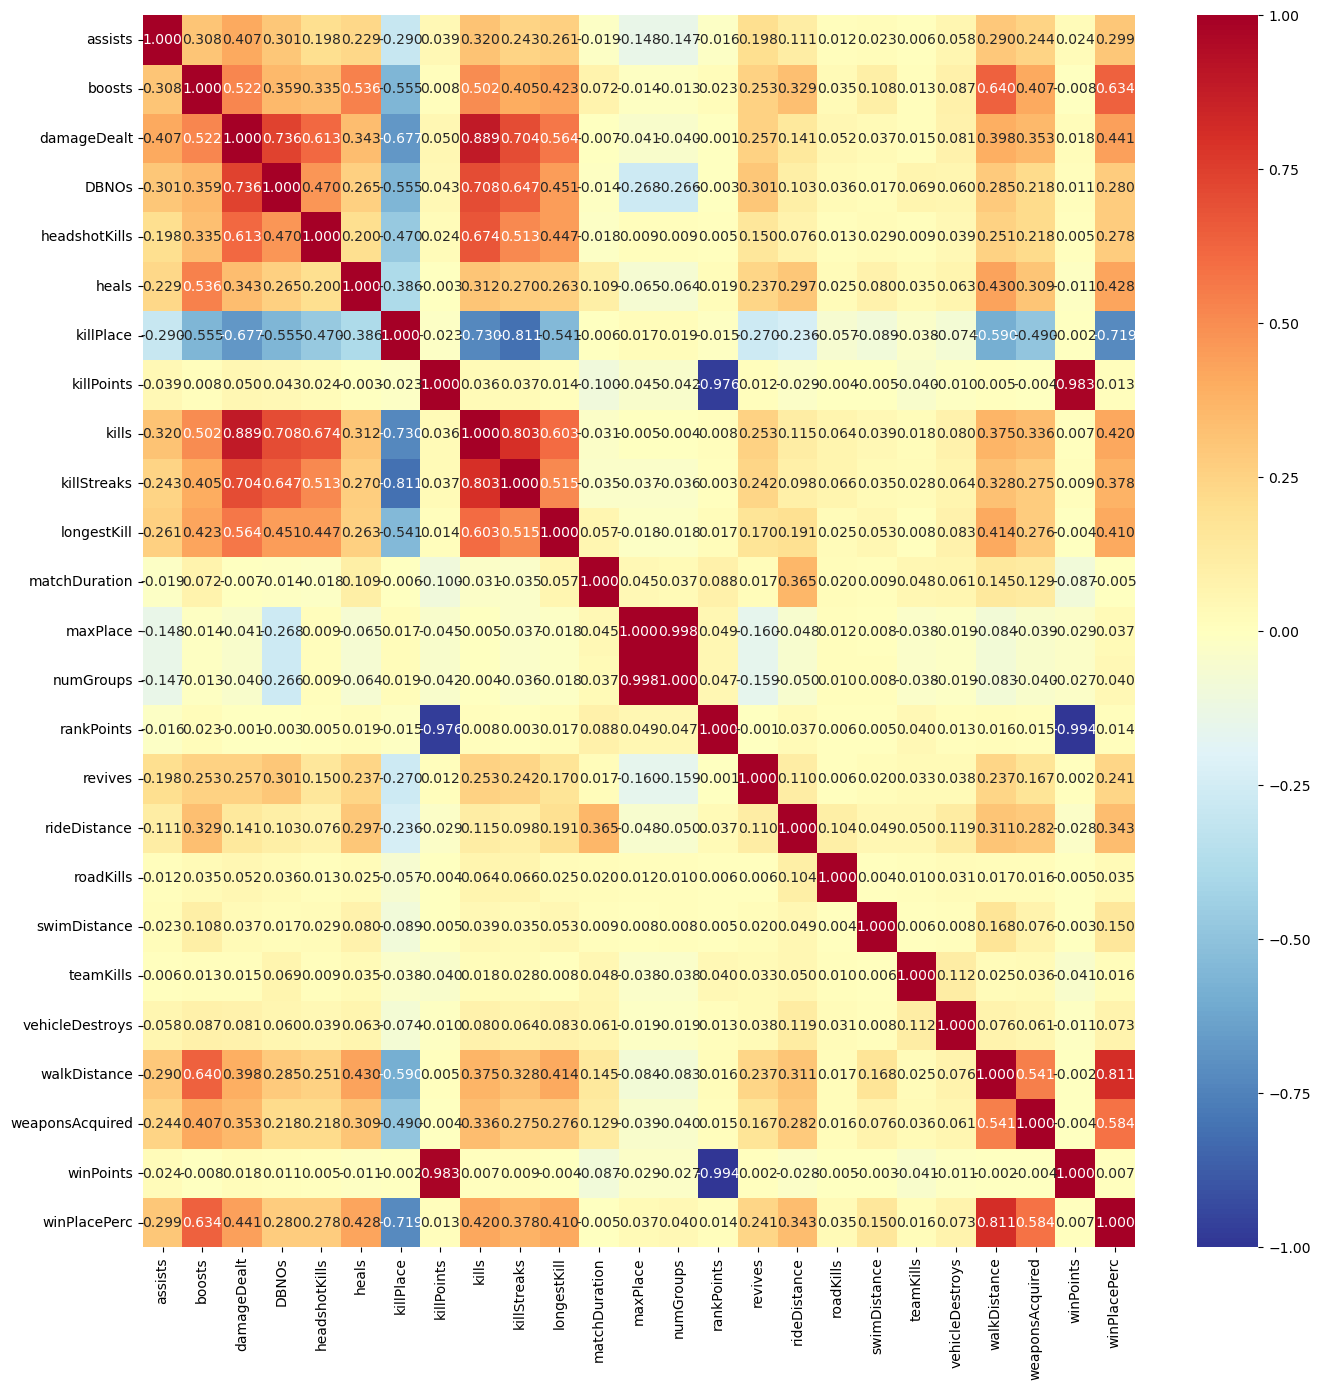

In [6]:
#상관관계로 승률과 관계있는 값들을 구해보기

plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

###  winPlacePerc 과 관련있는 값들(상관계수 0.5 이상)
- boots
- killPlace
- walkDistance
- weaponsAcquired

# kills 와 관계있는 값들

- damageDealt (0.888783)
- DBNOs (0.707848)
- headshotKills
- killPlace (-0.730499)
- killStreaks (0.802500)

In [7]:
# kill 수의 평균
print(data['kills'].mean())
print('\n')
print('describe() 를 통한 사분위수 확인\n') 
print(data['kills'].describe())

0.9247835321393355


describe() 를 통한 사분위수 확인

count    4.446965e+06
mean     9.247835e-01
std      1.558445e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64


- 유저들의 평균 킬수는 0.92킬, 가장 많이 죽인 횟수는 72킬.
- quantile() 을 이용해도 분위수를 구할 수 있다.

In [17]:
# 상위 5% 유저와 1% 유저의 킬 수

print(data['kills'].quantile(0.95))
print(data['kills'].quantile(0.99))

4.0
7.0


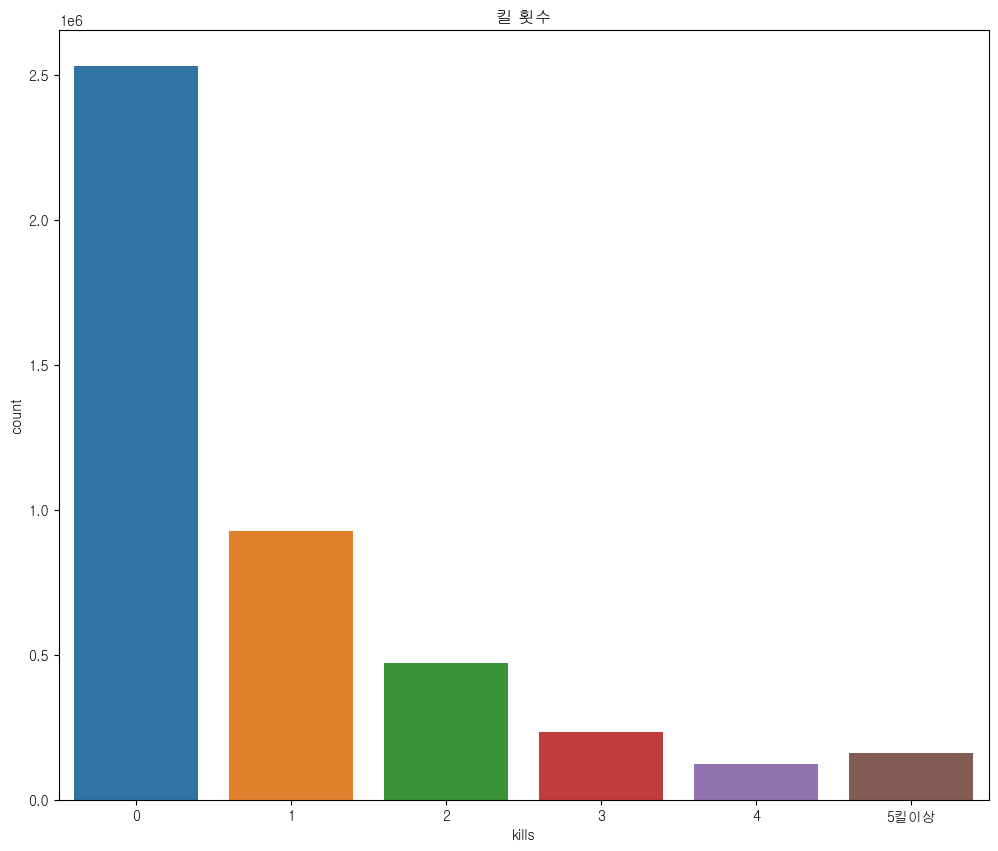

In [42]:
# kill 수를 그래프화
data1 = data.copy() #오류가 나 오류..

plt.figure(figsize=(12,10))
data1.loc[data['kills'] > data1['kills'].quantile(0.95)] = '5킬이상'
sns.countplot(x=data1['kills'].astype('str').sort_values())
plt.title("킬 횟수")
plt.show()

In [54]:
spst.pearsonr(data['winPlacePerc'], data['kills'])

PearsonRResult(statistic=0.41991598708955025, pvalue=0.0)

### ↑ 상관계수가 0.42, p-value가 0.05보다 작은 것을 보아.. 의미가 있는 값이라고 추측됨

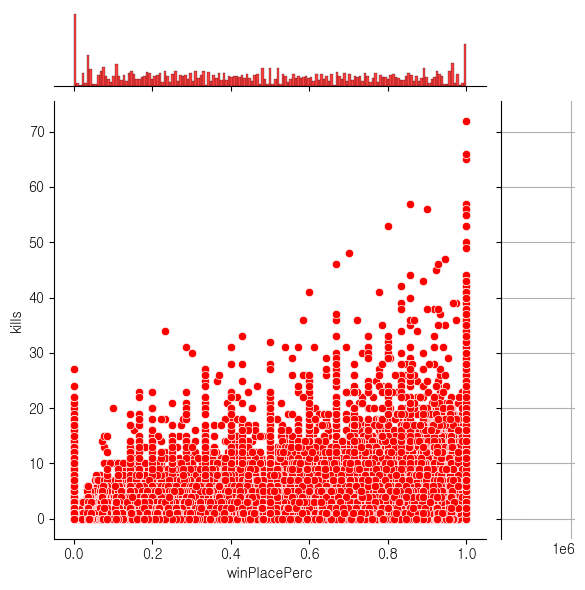

In [92]:
# 킬 수와 우승관의 관계 알아보기
sns.jointplot(x=data['winPlacePerc'], y=data['kills'], data=data, color='r')
plt.grid()
plt.show()

In [94]:
def graph(x, y, data, color):
    plt.figure(figsize = (10,8))
    sns.jointplot(x=data[x], y=data[y], data=data, color=color)
    plt.grid()
    plt.show()

### 킬 수와 승률과는 관계가 있다. 우승을 한 유저일수록 킬 수가 높은 것을 볼 수 있다

### 도핑 아이템 사용횟수와 승률 관계 알아보기

<Figure size 1000x800 with 0 Axes>

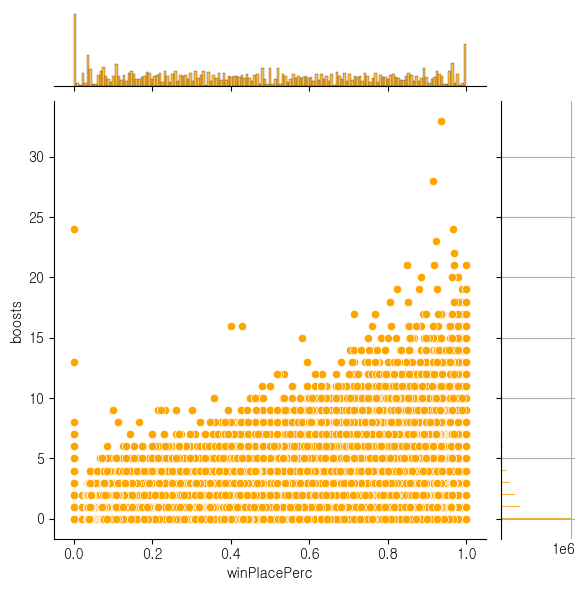

In [95]:
graph('winPlacePerc', 'boosts', data,'orange')

<Figure size 1000x800 with 0 Axes>

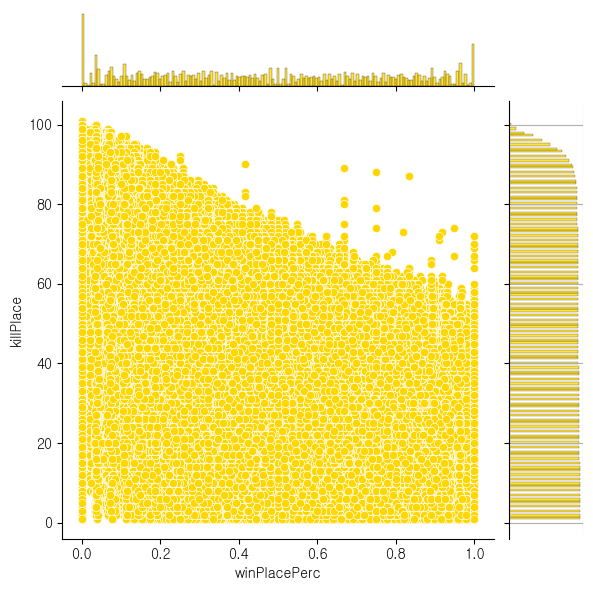

In [102]:
### 죽인 플레이어 수의 순위와 승률 관계
graph('winPlacePerc', 'killPlace', data, 'gold')

## 위의 그래프에서 killPlace의 숫자가 높을수록 게임을 잘 하지 못한 것이라고 할 수 있음

<Figure size 1000x800 with 0 Axes>

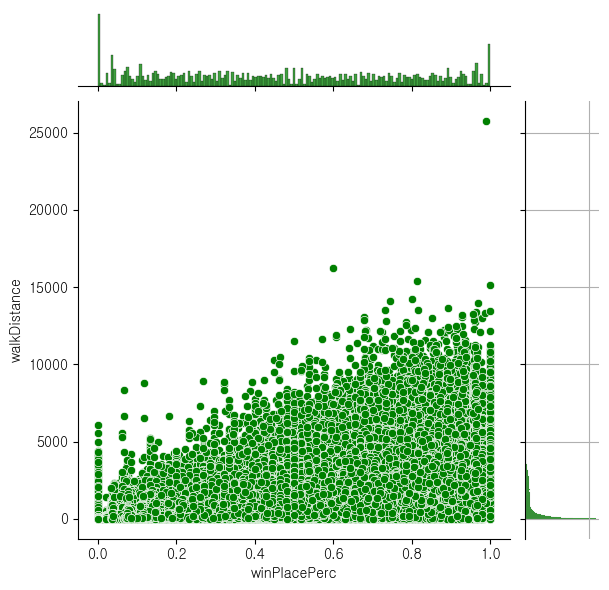

In [100]:
### 도보로 이동한 거리와 승률 관계
graph('winPlacePerc', 'walkDistance', data, 'green')

<Figure size 1000x800 with 0 Axes>

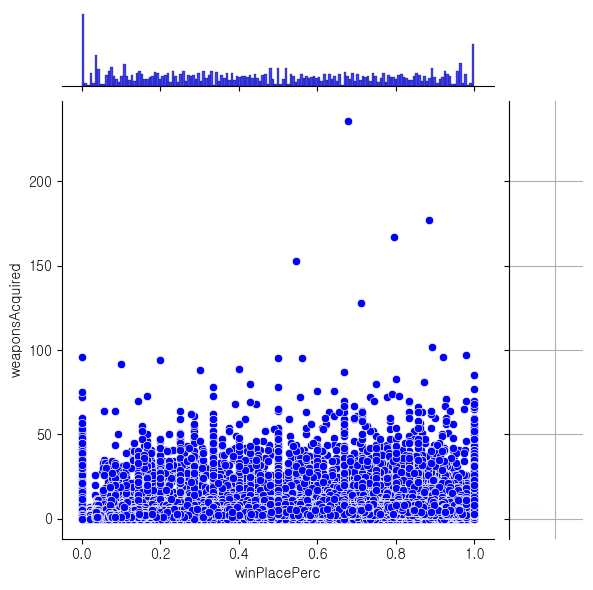

In [101]:
# 획득한 무기 수와 승률과의 관계
graph('winPlacePerc', 'weaponsAcquired', data, 'blue')

In [103]:
#위의 항목들에 대한 상관관계 분석 -> 시각화
cols = [data['winPlacePerc'], data['boosts'], data['killPlace'],data['walkDistance'] ,data['weaponsAcquired'] ]
df = pd.DataFrame(cols).T
corr = df.corr(method='pearson')
print(corr)

                 winPlacePerc    boosts  killPlace  walkDistance  \
winPlacePerc         1.000000  0.634234  -0.719069      0.810888   
boosts               0.634234  1.000000  -0.554844      0.640150   
killPlace           -0.719069 -0.554844   1.000000     -0.590236   
walkDistance         0.810888  0.640150  -0.590236      1.000000   
weaponsAcquired      0.583806  0.406609  -0.490144      0.541222   

                 weaponsAcquired  
winPlacePerc            0.583806  
boosts                  0.406609  
killPlace              -0.490144  
walkDistance            0.541222  
weaponsAcquired         1.000000  


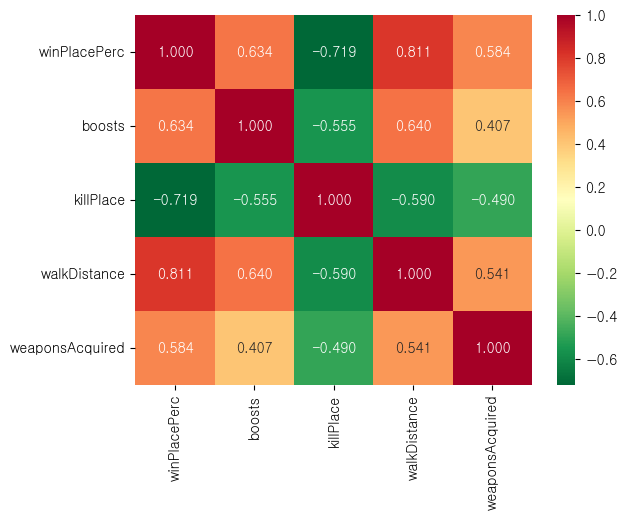

In [104]:
sns.heatmap(df.corr(),
            annot = True,            
            fmt = '.3f',            
            cmap = 'RdYlGn_r')   #red, yellow, green  
plt.show()

## 한 번에 산점도 그리기

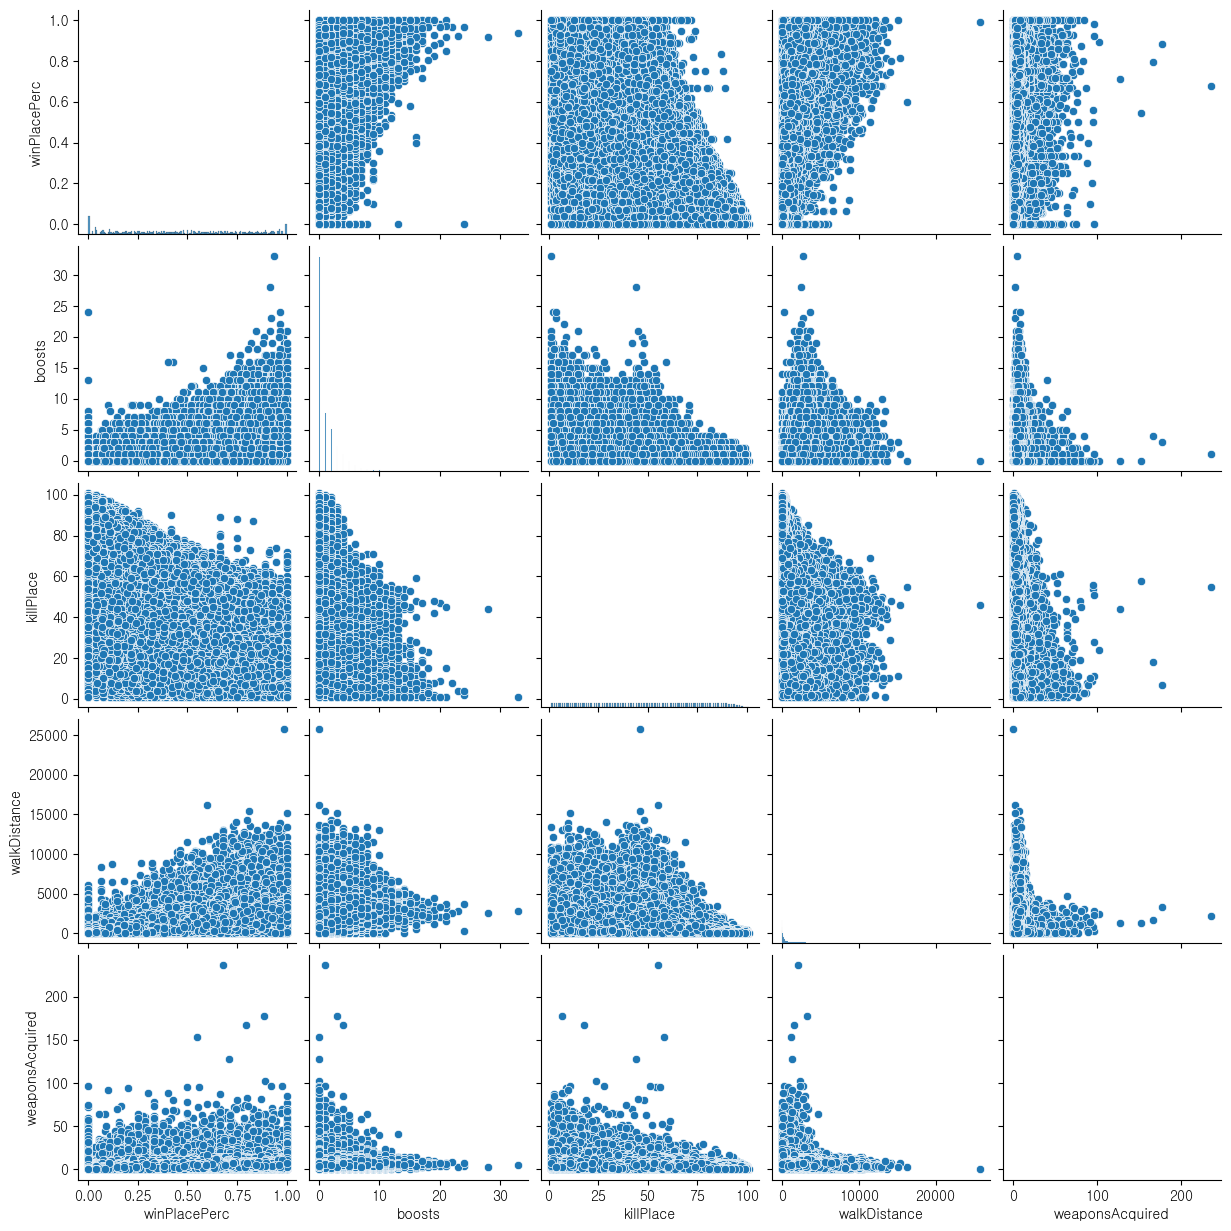

In [107]:
sns.pairplot(df)
plt.show()